In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
from gensim.models import KeyedVectors
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np

In [ ]:
df = pd.read_csv('cyberbully.csv')

In [ ]:
# Define the tokenize function of the tweets from the raw data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()

def preprocess_tweet(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and not token in stop_words]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load pre-trained word2vec model from the google news

import gensim.downloader as api

word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Define the function from tweets to word embeddings

def tweet_to_embedding(tweet, model):
    words = preprocess_tweet(tweet)
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    tweet_embedding = np.mean(word_vectors, axis=0)
    return tweet_embedding

In [ ]:
# Convert each tweet from the column 'text' to an embedding and store the result in a new column 'embedding'
df['embedding'] = df['text'].apply(lambda x: tweet_to_embedding(x, word2vec_model))

In [ ]:
# Save as a new csv
df.to_csv('tweets_embeddings.csv', index=False)

In [ ]:
# Tensorflow

In [ ]:
from sklearn.model_selection import train_test_split

# input X is 'embedding' column and the output y is the 'label' column
# Convert X into a list
X = np.array(df['embedding'].tolist())
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Step 2: Preprocess the labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
y = to_categorical(df['label_encoded'])

# Step 3: Prepare the embeddings
X = np.vstack(df['embedding'].values)

# Step 5: Build the model
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Step 6: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 7: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Step 9: Save the model
model.save('tweet_classification_model.h5')

In [ ]:
# MLPClassifier

In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with 'embedding' and 'label' columns
# Convert X into a list
X = np.array(df['embedding'].tolist())
y = df['label'].values

# Encode the string labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
# Here you can specify the architecture. For example, two hidden layers with 100 neurons each:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=300)

# Train the model
mlp.fit(X_train, y_train)

# After fitting the model, you can check if the training process has converged
print("Training converged:", mlp.n_iter_)  # Shows the number of iterations until convergence

Training converged: 77


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict labels for the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.978097809780978
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3425
           1       0.97      0.98      0.97      3336
           2       0.98      0.98      0.98     10082
           3       0.98      0.97      0.97      3155

    accuracy                           0.98     19998
   macro avg       0.98      0.98      0.98     19998
weighted avg       0.98      0.98      0.98     19998



In [ ]:
from sklearn.metrics import mean_squared_error
# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0502050205020502


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[3327   38   57    3]
 [  24 3260   44    8]
 [  65   46 9913   58]
 [  16    8   71 3060]]


<Figure size 1000x700 with 0 Axes>

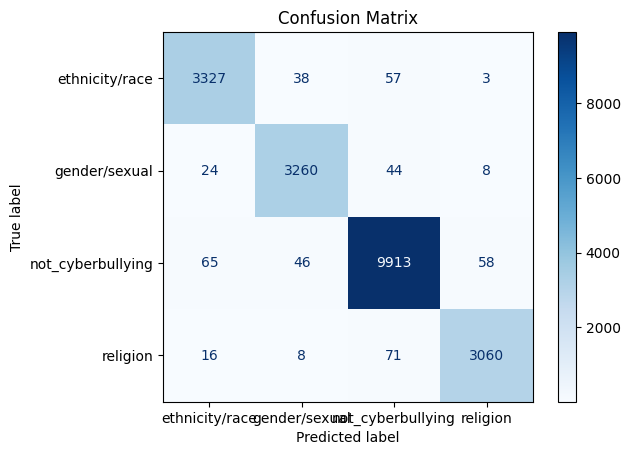

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, classification_report

# Assuming your data is already loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=16, solver='liblinear', penalty='l2')  # 'liblinear' is good for small datasets

# Train the model
log_reg.fit(X_train, y_train)

print("Number of iterations:", log_reg.n_iter_)

Number of iterations: [9 9 7 9]


In [ ]:
# Predict labels for the test set
y_pred_lr = log_reg.predict(X_test)

# Calculate overall accuracy, precision, recall and F1-Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr,average='weighted'))
print('Logistic Regression Recall:', recall_score(y_test, y_pred_lr,average='weighted'))
print('Logistic Regression F1_score:', f1_score(y_test, y_pred_lr,average='weighted'))

# Detailed classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9371437143714372
Logistic Regression Precision: 0.9376767750200538
Logistic Regression Recall: 0.9371437143714372
Logistic Regression F1_score: 0.9368360420649989
Logistic Regression Classification Report:
                   precision    recall  f1-score   support

   ethnicity/race       0.95      0.88      0.91      3425
    gender/sexual       0.94      0.90      0.92      3336
not_cyberbullying       0.93      0.97      0.95     10082
         religion       0.96      0.94      0.95      3155

         accuracy                           0.94     19998
        macro avg       0.94      0.92      0.93     19998
     weighted avg       0.94      0.94      0.94     19998



<ipython-input-38-c78c8e6a56c7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-38-c78c8e6a56c7>:28: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-38-c78c8e6a56c7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-38-c78c8e6a56c7>:28: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-38-c78c8e6a56c7

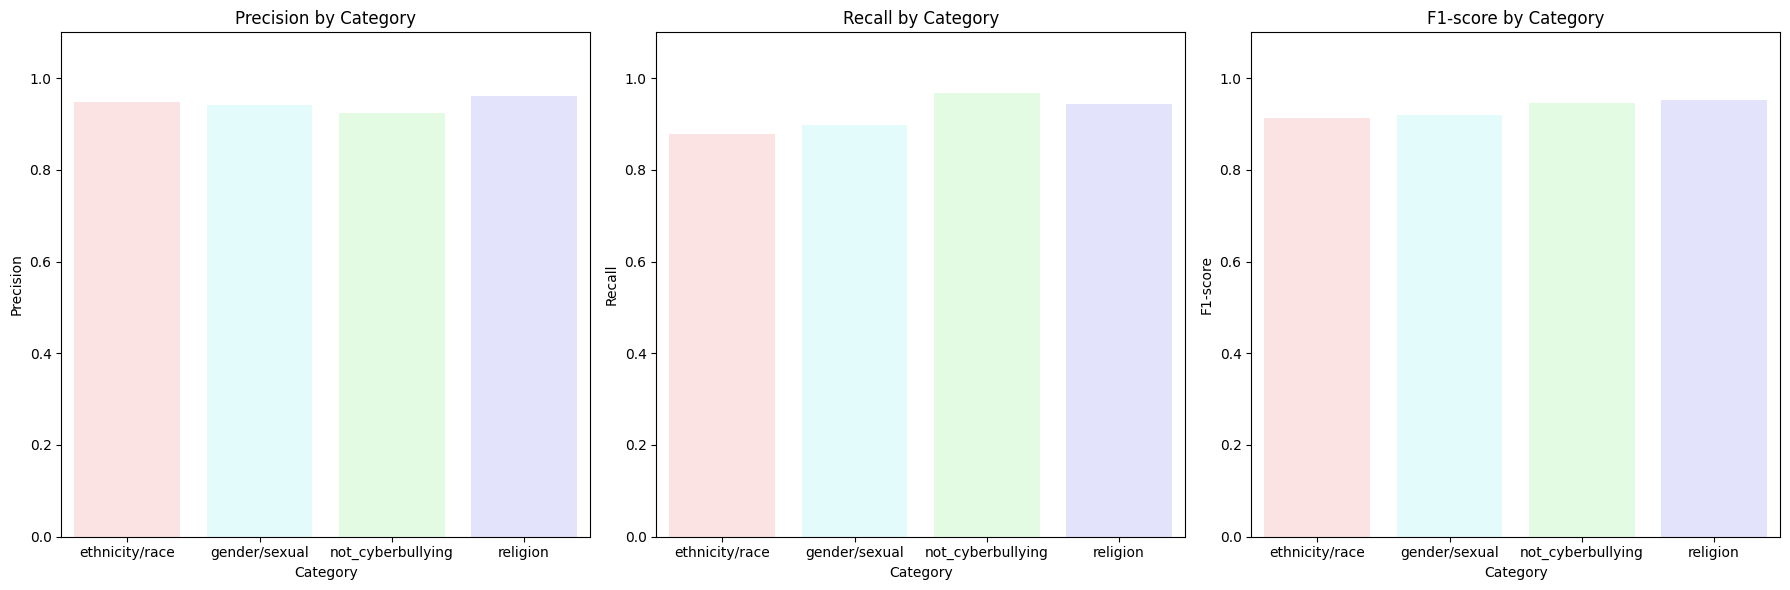

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_report = classification_report(y_test, y_pred_lr, output_dict=True)

def visualize_report(report):
    # Define custom colors
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']

    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit() or cls in ['ethnicity/race', 'gender/sexual', 'not_cyberbullying', 'religion']:
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)

    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]):  # Exclude 'support' for plotting
        sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
        ax.set_title(f'{metric.capitalize()} by Category')
        ax.set_ylim(0, 1.1)
        ax.set_xlabel('Category')
        ax.set_ylabel(metric.capitalize())

    plt.tight_layout()
    plt.show()

visualize_report(class_report)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Initialize and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_preds = svm_model.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, svm_preds)
precision = precision_score(y_test, svm_preds, average='weighted')
recall = recall_score(y_test, svm_preds, average='weighted')
f1 = f1_score(y_test, svm_preds, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Accuracy: 0.9758475847584759
Precision: 0.9758964686795808
Recall: 0.9758475847584759
F1 Score: 0.9757786499341085


In [ ]:
# Classification report for SVM classification model
svm_report = classification_report(y_test, svm_preds)
print(svm_report)

                   precision    recall  f1-score   support

   ethnicity/race       0.97      0.95      0.96      3425
    gender/sexual       0.97      0.96      0.97      3336
not_cyberbullying       0.97      0.99      0.98     10082
         religion       0.99      0.97      0.98      3155

         accuracy                           0.98     19998
        macro avg       0.98      0.97      0.97     19998
     weighted avg       0.98      0.98      0.98     19998



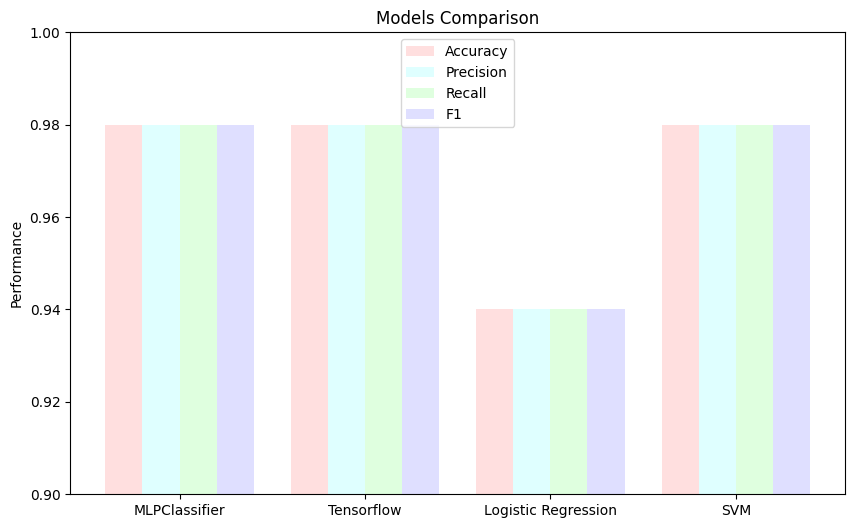

In [ ]:
# Model Comparisons

models = ['MLPClassifier', 'Tensorflow', 'Logistic Regression', 'SVM']
accuracy = [0.98, 0.98, 0.94, 0.98]
precision = [0.98, 0.98, 0.94, 0.98]
recall = [0.98, 0.98, 0.94, 0.98]
f1 = [0.98, 0.98, 0.94, 0.98]

bar_width = 0.2

# Plot
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot
plt.figure(figsize=(10, 6))

plt.bar(r1, accuracy, color='#ffdfdf', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='#dfffff', width=bar_width, label='Precision')
plt.bar(r3, recall, color='#dfffdf', width=bar_width, label='Recall')
plt.bar(r4, f1, color='#dfdfff',width=bar_width, label='F1')

# Add xticks on the middle of the group bars

plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)
plt.title('Models Comparison')
plt.ylabel('Performance')
plt.ylim(0.9, 1)
plt.legend()

plt.show()

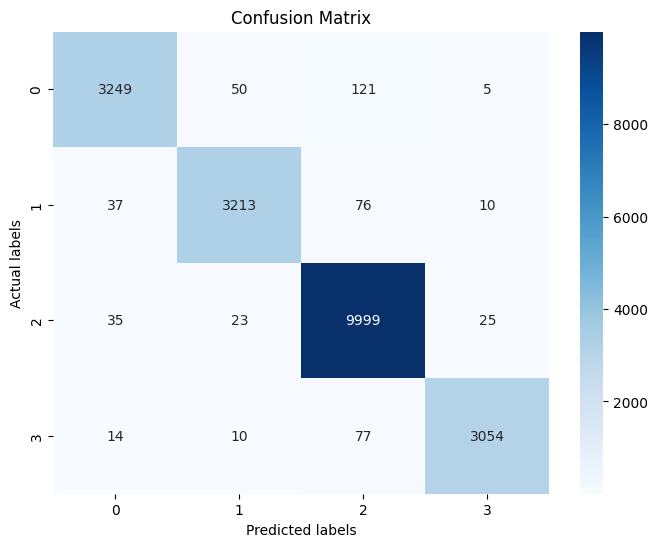

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, svm_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()